In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD
# Plot
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import os

path = '/content/drive/My Drive/Orange4Home/sensor_data_processed_normalizing_the_label_with_hot_encoding_timestamps_normalizing.csv'

data = pd.read_csv(path, index_col='Time',parse_dates=True)

training_labels = ['Timestamps','bedroom_switch_middle_left',
 'entrance_heater_effective_setpoint',
 'bedroom_switch_middle_right',
 'kitchen_noise',
 'livingroom_couch_plug_consumption',
 'global_snow_ext',
 'bedroom_heater1_effective_setpoint',
 'global_lighting_power',
 'livingroom_heater2_base_setpoint',
 'kitchen_dishwasher_current',
 'toilet_coldwater_total',
 'kitchen_hood_voltage',
 'kitchen_washingmachine_partial_energy',
 'walkway_switch2_bottom_left',
 'livingroom_shutter5',
 'kitchen_hood_total_energy',
 'bathroom_heater_command',
 'walkway_noise',
 'entrance_noise',
 'livingroom_shutter4',
 'livingroom_switch2_top_left',
 'global_rain_ext',
 'global_wind_speed_ext',
 'global_waterheater_total_energy',
 'global_lighting_current',
 'livingroom_heater2_temperature',
 'livingroom_tv_status',
 'office_tv_plug_consumption',
 'kitchen_fridge_power',
 'bedroom_closet_door',
 'bathroom_luminosity',
 'livingroom_tv_plug_consumption',
 'office_AC_setpoint',
 'bathroom_switch_bottom_right',
 'bedroom_light4',
 'office_heater_effective_mode',
 'global_lighting_total_energy',
 'kitchen_cupboard3',
 'toilet_switch_left',
 'entrance_heater_base_setpoint',
 'office_heater_command',
 'bedroom_light2',
 'livingroom_table_luminosity',
 'global_voltage',
 'bedroom_temperature',
 'kitchen_fridge_door',
 'bathroom_sink_coldwater_total',
 'global_lighting_partial_energy',
 'livingroom_couch_noise',
 'global_temperature_feel_ext',
 'livingroom_humidity',
 'kitchen_oven_current',
 'livingroom_presence_table',
 'bathroom_switch_bottom_left',
 'livingroom_heater1_command',
 'staircase_light',
 'office_noise',
 'kitchen_sink_hotwater_total',
 'bathroom_switch_top_right',
 'bedroom_switch_bottom_left',
 'livingroom_presence_couch',
 'livingroom_heater2_effective_setpoint',
 'bedroom_presence',
 'toilet_switch_right',
 'bedroom_humidity',
 'livingroom_heater1_effective_mode',
 'bedroom_heater2_effective_setpoint',
 'livingroom_heater2_command',
 'bedroom_shutter1',
 'global_active_power',
 'walkway_switch1_bottom_left',
 'kitchen_hood_current',
 'entrance_heater_temperature',
 'bedroom_CO2',
 'livingroom_table_plug_consumption',
 'bathroom_CO2',
 'bathroom_temperature',
 'bedroom_drawer1',
 'office_switch_right',
 'global_heaters_temperature',
 'global_waterheater_current',
 'kitchen_dishwasher_voltage',
 'global_shutters_voltage',
 'walkway_switch1_bottom_right',
 'livingroom_heater1_effective_setpoint',
 'livingroom_light1',
 'bathroom_heater_temperature',
 'kitchen_cooktop_current',
 'entrance_switch_left',
 'toilet_coldwater_instantaneous',
 'kitchen_oven_voltage',
 'bathroom_sink_hotwater_instantaneous',
 'staircase_switch_right',
 'kitchen_sink_coldwater_instantaneous',
 'livingroom_heater2_effective_mode',
 'office_tv_status',
 'global_shutters_current',
 'kitchen_fridge_current',
 'kitchen_washingmachine_total_energy',
 'bedroom_shutter2',
 'bathroom_light2',
 'global_waterheater_partial_energy',
 'global_frequency',
 'kitchen_switch_bottom_right',
 'bedroom_door',
 'kitchen_luminosity',
 'bedroom_heater2_command',
 'entrance_heater_command',
 'global_pressure_ext',
 'kitchen_oven_partial_energy',
 'global_shutters_power',
 'office_luminosity',
 'kitchen_cooktop_total_energy',
 'kitchen_washingmachine_voltage',
 'bathroom_light1',
 'bedroom_luminosity',
 'office_presence',
 'bathroom_heater_effective_setpoint',
 'bathroom_shower_hotwater_instantaneous',
 'livingroom_switch1_top_left',
 'bathroom_humidity',
 'kitchen_cupboard5',
 'bathroom_shower_coldwater_total',
 'bathroom_shower_coldwater_instantaneous',
 'office_window',
 'kitchen_switch_bottom_left',
 'kitchen_dishwasher_partial_energy',
 'kitchen_fridge_voltage',
 'office_heater_effective_setpoint',
 'office_heater_temperature',
 'livingroom_window1',
 'bathroom_sink_hotwater_total',
 'kitchen_cooktop_voltage',
 'kitchen_hood_power',
 'kitchen_sink_hotwater_instantaneous',
 'global_current',
 'global_condition_id_ext',
 'livingroom_switch1_top_right',
 'office_AC_mode',
 'bedroom_heater2_effective_mode',
 'walkway_light',
 'bathroom_door',
 'global_clouds_ext',
 'global_shutters_total_energy',
 'bedroom_heater1_effective_mode',
 'bedroom_light1',
 'kitchen_cupboard1',
 'livingroom_temperature',
 'livingroom_CO2',
 'global_shutters_partial_energy',
 'bathroom_shower_hotwater_total',
 'kitchen_switch_top_right',
 'kitchen_cooktop_partial_energy',
 'global_waterheater_power',
 'kitchen_sink_coldwater_total',
 'kitchen_oven_total_energy',
 'global_power_factor',
 'kitchen_washingmachine_current',
 'global_coldwater_instantaneous',
 'office_desk_plug_consumption',
 'livingroom_switch1_bottom_left',
 'entrance_door',
 'global_active_energy',
 'global_coldwater_total',
 'bathroom_heater_effective_mode',
 'office_light',
 'walkway_switch1_top_right',
 'global_humidity_ext',
 'livingroom_AC_setpoint',
 'walkway_switch2_top_right',
 'bathroom_switch_top_left',
 'kitchen_cupboard2',
 'office_heater_base_setpoint',
 'bedroom_light3',
 'kitchen_dishwasher_total_energy',
 'livingroom_shutter3',
 'kitchen_light2',
 'kitchen_cooktop_power',
 'office_switch_left',
 'toilet_light',
 'livingroom_shutter2',
 'bathroom_presence',
 'livingroom_light2',
 'bedroom_switch_top_right',
 'livingroom_heater1_temperature',
 'bedroom_switch_top_left',
 'walkway_switch1_top_left',
 'livingroom_switch2_top_right',
 'walkway_switch2_bottom_right',
 'kitchen_dishwasher_power',
 'global_heaters_setpoint',
 'bedroom_AC_setpoint',
 'kitchen_temperature',
 'bedroom_heater2_temperature',
 'kitchen_fridge_partial_energy',
 'bedroom_switch_bottom_right',
 'office_shutter',
 'bedroom_drawer2',
 'global_temperature_ext',
 'bedroom_heater1_command',
 'bathroom_heater_base_setpoint',
 'bedroom_bed_pressure',
 'livingroom_table_noise',
 'global_lighting_voltage',
 'office_switch_middle',
 'global_gas_total',
 'global_waterheater_status',
 'office_door',
 'kitchen_washingmachine_power',
 'staircase_switch_left',
 'bedroom_heater2_base_setpoint',
 'entrance_heater_effective_mode',
 'bedroom_heater1_temperature',
 'entrance_light1',
 'livingroom_shutter1',
 'livingroom_heater1_base_setpoint',
 'kitchen_CO2',
 'walkway_switch2_top_left',
 'kitchen_switch_top_left',
 'kitchen_fridge_total_energy',
 'bathroom_shower_door',
 'bedroom_heater1_base_setpoint',
 'kitchen_light1',
 'kitchen_hood_partial_energy',
 'global_waterheater_voltage',
 'kitchen_cupboard4',
 'bathroom_sink_coldwater_instantaneous',
 'bedroom_noise',
 'kitchen_humidity',
 'kitchen_oven_power',
 'kitchen_presence',
 'livingroom_luminosity',
 'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'down',
 'equal',
 'up',
 'Couvert',
 'brouillard',
 'brume',
 'ensoleillé',
 'légères pluies',
 'nuageux',
 'partiellement ensoleillé',
 'peu nuageux',
 'cloudy',
 'few-showers',
 'fog',
 'mostly-cloudy-day',
 'partly-cloudy-day',
 'sunny']

classes_labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
X = data[training_labels]
y = data[classes_labels]
y = y.values
X = X.values




In [178]:
def reverse_onehot(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

In [179]:
y_reverse_onehot = reverse_onehot(y)

In [180]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest 
from sklearn.feature_selection import VarianceThreshold
import math


# X is your feature matrix
# y is your target variable

# Create a VarianceThreshold transformer to remove zero-variance features
vt = VarianceThreshold()
# Fit the transformer on the feature matrix X to learn the feature variances
vt.fit(X)
# Transform the feature matrix X to remove zero-variance features
X_vt = vt.transform(X)
# Create a SelectKBest transformer to select the top k features based on the F-test
fs = SelectKBest(score_func=f_classif, k=100)
# Apply the SelectKBest transformer on the variance-thresholded feature matrix X_vt
X_kbest = fs.fit_transform(X_vt, reverse_onehot(y))
# Apply feature selection
#fs.fit(X,reverse_onehot(y))
fs.get_support()

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False, False,  True, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [181]:
fs.get_support().sum()

100

In [182]:
def list_ceil(x):
    return[math.ceil(i) for i in x]

In [183]:
print("P_Values :")
print(np.round(fs.pvalues_,5))
print("F Values :")
print(fs.scores_)

P_Values :
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.88095 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.  

In [184]:
list_ceil(fs.scores_)

[131,
 145,
 111,
 155,
 179,
 9423,
 93,
 60306,
 60,
 107,
 512,
 894,
 1074,
 9970,
 141,
 818,
 2102,
 417,
 9970,
 533,
 266,
 156,
 134,
 31513,
 234,
 209343,
 335380,
 133,
 75,
 420029,
 480683,
 140,
 645,
 498740,
 1171,
 361,
 596,
 561,
 60,
 1043,
 528796,
 3602,
 88,
 159,
 193,
 229,
 363,
 17912,
 634,
 200,
 15528,
 769,
 1125,
 14230,
 222,
 170,
 644,
 145,
 8074,
 101,
 3780,
 638,
 572,
 950,
 92,
 855,
 27831,
 840,
 54,
 27142,
 474,
 3915,
 9447,
 3370,
 335,
 212,
 129,
 704,
 537,
 802,
 856,
 628,
 135,
 21479,
 207,
 43017,
 358,
 3262,
 985,
 40,
 1229,
 1571,
 672,
 143043,
 2801,
 111,
 894,
 27842,
 443811,
 133,
 1,
 148,
 195,
 3422,
 796,
 1238,
 161,
 53,
 7144,
 2972,
 159,
 468,
 396347,
 138337,
 2244,
 124,
 20026,
 611,
 631,
 134,
 160,
 10218,
 124,
 140,
 301,
 508,
 188,
 255,
 58,
 145,
 1067,
 321098,
 15278,
 920,
 135,
 568,
 184,
 590,
 23730,
 789,
 164,
 220,
 601,
 527709,
 138,
 540,
 3351,
 219,
 151,
 149,
 159,
 1696,
 134,
 53,

In [185]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(training_labels)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(100,columns="Score"))

                           Input_Features         Score  P_Value
162                         entrance_door  2.153089e+06      0.0
40          entrance_heater_base_setpoint  5.287954e+05      0.0
143                     global_clouds_ext  5.277084e+05      0.0
33                     office_AC_setpoint  4.987394e+05      0.0
170             walkway_switch2_top_right  4.987394e+05      0.0
..                                    ...           ...      ...
77                   bathroom_temperature  7.035562e+02      0.0
215                   livingroom_shutter1  6.782743e+02      0.0
194           bedroom_heater2_temperature  6.761792e+02      0.0
92   bathroom_sink_hotwater_instantaneous  6.716594e+02      0.0
195         kitchen_fridge_partial_energy  6.514859e+02      0.0

[100 rows x 3 columns]


In [186]:
Feature_selection_dataFrame = feature_score.nlargest(100,columns="Score")

In [187]:
Feature_selection_dataFrame= Feature_selection_dataFrame.sort_values('Score', ascending=False)
Feature_selection_dataFrame

,Input_Features,Score,P_Value
162,entrance_door,2.153089e+06,0.0
40,entrance_heater_base_setpoint,5.287954e+05,0.0
143,global_clouds_ext,5.277084e+05,0.0
33,office_AC_setpoint,4.987394e+05,0.0
170,walkway_switch2_top_right,4.987394e+05,0.0
...,...,...,...
77,bathroom_temperature,7.035562e+02,0.0
215,livingroom_shutter1,6.782743e+02,0.0
194,bedroom_heater2_temperature,6.761792e+02,0.0
92,bathroom_sink_hotwater_instantaneous,6.716594e+02,0.0


In [188]:
features_selection_models=Feature_selection_dataFrame['Input_Features'].values

In [189]:
from sklearn.model_selection import train_test_split

X = data[features_selection_models]
y = data[classes_labels]

y = y.values
X = X.values

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.3)
x_train.shape

(268599, 100, 1)

#LSTM Model Building

In [190]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, InputLayer, GRU
from keras.optimizers import RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_CUDNN'] = '1'

from keras.layers import CuDNNLSTM



# hyper-parameters
num_classes = 25
input_shape = (x_train.shape[1],)
hidden_nodes= (x_train.shape[1]+num_classes)/2
input_nodes = x_train.shape[1]

model = Sequential()
# first layer with 
model.add(InputLayer((100, 1)))
model.add(Dense(int(input_nodes), activation='tanh'))


#model.add(LSTM(int(input_nodes), activation='tanh', return_sequences=True))
model.add(GRU(int(input_nodes), activation='tanh'))
#model.add(LSTM(int(hidden_nodes), activation='tanh'))

# Dropout of 50%
model.add(Dropout(0.5))

# L
model.add(Dense(hidden_nodes, activation='tanh'))

#model.add(Dense(int(hidden_nodes/2), activation='tanh'))


# Classification Layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100, 100)          200       
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 62)                6262      
                                                                 
 dense_17 (Dense)            (None, 25)                1575      
                                                                 
Total params: 68,637
Trainable params: 68,637
Non-trainable params: 0
_________________________________________________________________


In [191]:
sgd = SGD(learning_rate=0.05,  momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [192]:
batch_size = 34
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
7900/7900 [==============================] - 65s 8ms/step - loss: 0.7509 - accuracy: 0.7735 - val_loss: 0.4573 - val_accuracy: 0.8439
Epoch 2/10
7900/7900 [==============================] - 65s 8ms/step - loss: 0.4219 - accuracy: 0.8684 - val_loss: 0.3417 - val_accuracy: 0.8893
Epoch 3/10
7900/7900 [==============================] - 62s 8ms/step - loss: 0.3418 - accuracy: 0.8913 - val_loss: 0.3928 - val_accuracy: 0.8900
Epoch 4/10
7900/7900 [==============================] - 62s 8ms/step - loss: 0.3625 - accuracy: 0.8858 - val_loss: 0.3192 - val_accuracy: 0.8856
Epoch 5/10
7900/7900 [==============================] - 64s 8ms/step - loss: 0.3247 - accuracy: 0.8944 - val_loss: 0.2953 - val_accuracy: 0.9063
Epoch 6/10
7900/7900 [==============================] - 61s 8ms/step - loss: 0.3496 - accuracy: 0.8880 - val_loss: 0.3018 - val_accuracy: 0.8940
Epoch 7/10
7900/7900 [==============================] - 62s 8ms/step - loss: 0.4220 - accuracy: 0.8682 - val_loss: 0.3364 - val_ac

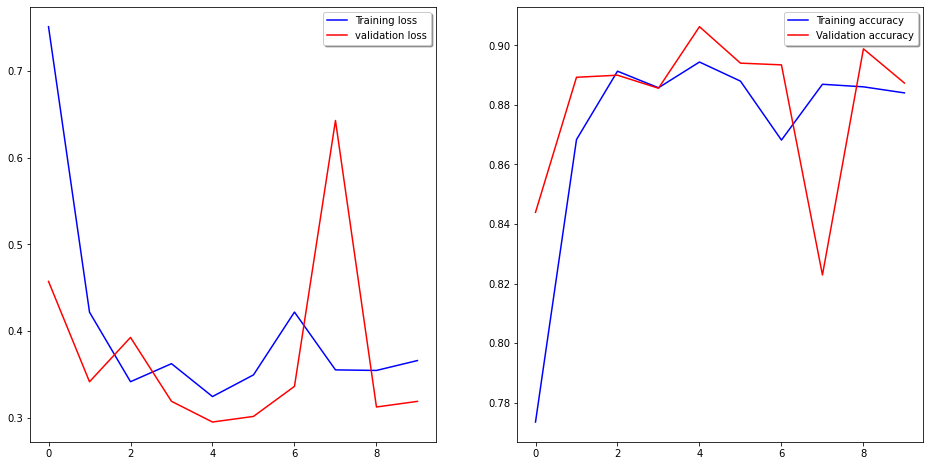

In [193]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [194]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3191262483596802
Test accuracy: 0.8873606324195862


In [195]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32249894738197327
Test accuracy: 0.8874162435531616


In [196]:
# Classification
y_pred = model.predict(x_test)

y_pred

2519/2519 [==============================] - 9s 3ms/step


array([[1.1027568e-05, 1.6212481e-06, 1.4068893e-06, ..., 9.3641131e-07,
        2.2557947e-06, 1.2302991e-04],
       [8.6613809e-06, 1.1868066e-06, 9.9743374e-07, ..., 7.8775759e-07,
        1.6372403e-06, 9.6802374e-05],
       [8.8363113e-06, 1.2055705e-06, 1.0183767e-06, ..., 7.9571032e-07,
        1.6511922e-06, 9.9861943e-05],
       ...,
       [1.6850325e-05, 3.0511574e-06, 2.8349766e-06, ..., 1.2891830e-06,
        4.6564855e-06, 1.8607949e-04],
       [8.6599930e-06, 1.1762442e-06, 9.8989733e-07, ..., 7.8563590e-07,
        1.6115546e-06, 9.7546355e-05],
       [8.4733963e-03, 5.1278351e-03, 4.4146713e-02, ..., 1.4010555e-02,
        8.1393681e-03, 6.2299043e-02]], dtype=float32)

In [197]:

for i in range(0,len(y_pred)):
# Get the index of the maximum value in the output list
  max_index = np.argmax(y_pred[i])
  # Create a binary vector with the maximum value as 1 and other values as 0
  y_pred[i] = np.zeros(len(y_pred[i]))

  y_pred[i][max_index] = 1

In [198]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [199]:
df_pred = pd.DataFrame( y_pred,columns=labels)

In [200]:
df_pred

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [201]:
original_array_pred = df_pred.idxmax(axis=1)

In [202]:
original_array_pred


0             Office|Computing
1             Office|Computing
2             Office|Computing
3              Bedroom|Reading
4             Office|Computing
                 ...          
80575         Office|Computing
80576         Office|Computing
80577         Office|Computing
80578         Office|Computing
80579    Living_room|Computing
Length: 80580, dtype: object

In [203]:
df_test = pd.DataFrame( y_test,columns=labels)
original_array_test = df_test.idxmax(axis=1)
original_array_test

0          Office|Computing
1          Office|Computing
2          Office|Computing
3           Bedroom|Reading
4          Office|Computing
                ...        
80575      Office|Computing
80576      Office|Computing
80577      Office|Computing
80578      Office|Computing
80579    Living_room|Eating
Length: 80580, dtype: object

In [204]:
cm = confusion_matrix(original_array_test,original_array_pred)

In [205]:
df_cm = pd.DataFrame( cm,columns=labels, index=labels)

In [206]:
df_cm

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Bathroom|Cleaning,0,0,0,0,0,11,0,3,0,0,...,77,0,0,0,0,0,0,0,0,0
Bathroom|Showering,0,2225,0,0,0,0,0,0,0,0,...,104,0,303,0,0,0,0,0,0,0
Bathroom|Using_the_sink,0,419,0,0,0,0,0,0,1,0,...,484,1,42,0,0,0,0,0,0,0
Bathroom|Using_the_toilet,0,0,0,24,0,0,0,0,0,0,...,161,0,1,0,22,0,0,0,0,39
Bedroom|Cleaning,0,0,0,0,0,44,3,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Bedroom|Dressing,0,0,0,0,0,228,20,11,0,0,...,9,5,0,0,2,0,0,0,0,2
Bedroom|Napping,0,1,0,0,0,10,2909,23,0,0,...,15,3,0,0,10,0,0,0,0,0
Bedroom|Reading,0,0,0,0,0,54,0,3190,0,0,...,0,0,0,0,0,0,0,0,0,1
Entrance|Entering,0,160,0,0,0,0,3,0,31,97,...,0,0,8,0,3,0,0,0,0,8
Entrance|Leaving,0,63,0,0,0,0,0,0,7,130,...,2,0,5,0,0,0,0,0,0,6


In [207]:
df_cm.to_csv("confusion_matrix_GRU_ANOVA_100.csv",index=True)

In [208]:
# y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

# Calculate the weighted average of precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
weights = np.sum(y_test, axis=0)
precision_weighted = np.sum(precision * weights) / np.sum(weights)
recall_weighted = np.sum(recall * weights) / np.sum(weights)
f1_score_weighted = np.sum(f1_score * weights) / np.sum(weights)

print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 score:", f1_score_weighted)

Precision: 0.8904703028222622
Recall: 0.8874162323157111
F1 score: 0.8701520902654796


In [210]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8874162323157111
